# Predicting the Impact of Climate Change on Agricultural Productivity 

### **Project Overview**

Agriculture is highly sensitive to climate change, and understanding the impact of various climate factors is essential for mitigating risks. 

This project predicts crop yield using climate and agricultural data, enabling better decision-making for adaptation strategies.

#### **The Processes Used in this project includes** 

1. Dataset Selection
2. Data Preprocessing
3. Data Visualization
4. Feature Engineering
5. Model Selection
6. Model Evaluation

#### **Machine Model Aspect of the Project**
This project would be carried out using Regression Tasks;

- Linear Regression
- Gradient Boosting
- Random Forest Regressor


#### **Major Aim of the Project** 
The aim of this project is to predict the Impact of climate Change on Agricultural Productivity

#### **Dataset Description**
The dataset contains information about various climate and agricultural factors across countries and regions. Below are the columns included in the dataset:

- **Year**: Year of data collection
- **Country**: Name of the country
- **Region**: Geographic region within the country
- **Crop_Type**: Type of crop grown (e.g., Wheat, Corn, etc.)
- **Average_Temperature_C**: Average temperature (°C) during the crop season
- **Total_Precipitation_mm**: Total rainfall (mm)
- **CO2_Emissions_MT**: Carbon dioxide emissions (metric tons)
- **Crop_Yield_MT_per_HA**: Crop yield (metric tons per hectare) **(Target variable)**
- **Extreme_Weather_Events**: Frequency of extreme weather events
- **Irrigation_Access_%**: Percentage of irrigation access
- **Pesticide_Use_KG_per_HA**: Pesticide usage (kg per hectare)
- **Fertilizer_Use_KG_per_HA**: Fertilizer usage (kg per hectare)
- **Soil_Health_Index**: Soil quality index (0–100)
- **Adaptation_Strategies**: Strategies implemented to adapt to climate change
- **Economic_Impact_Million_USD**: Economic impact in USD (millions)

**Data Source**: Kaggle

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns  # For enhanced data visualizations
%matplotlib inline

In [53]:
# To silence warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Selection

In [60]:
data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')
data.head(10)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
5,2019,USA,Midwest,Coffee,17.19,975.13,10.73,2.180,5,52.45,26.06,71.56,97.32,Water Management,353.16
6,1997,Argentina,Northeast,Fruits,23.46,1816.41,27.70,1.611,2,20.22,0.56,28.72,79.09,Organic Farming,480.61
7,2021,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,4,66.53,13.44,40.50,63.16,Drought-resistant Crops,1367.97
8,2012,India,Punjab,Wheat,32.08,1233.10,6.10,2.990,1,45.87,10.09,32.54,42.31,Water Management,761.89
9,2018,Nigeria,North West,Barley,21.23,475.32,25.74,0.765,1,25.74,44.38,72.92,84.21,No Adaptation,167.21


In [229]:
data.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


### Data Preprocessing

In [153]:
# Display column names
data.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

### Data Visualization

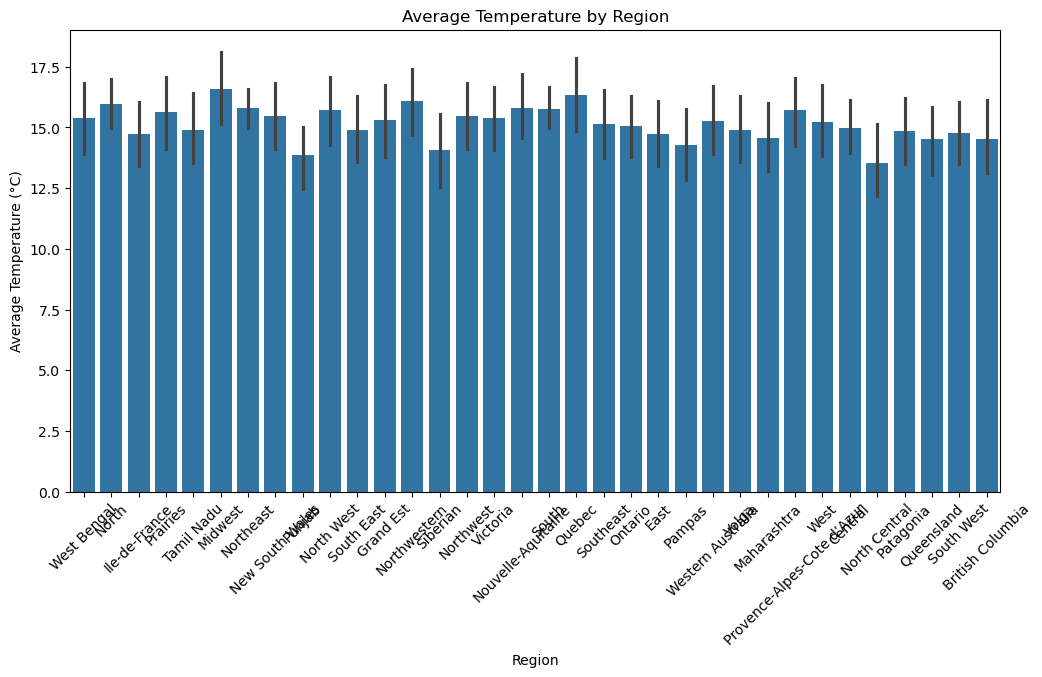

In [161]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Average_Temperature_C', data=data, estimator='mean')
plt.title('Average Temperature by Region')
plt.xlabel('Region')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

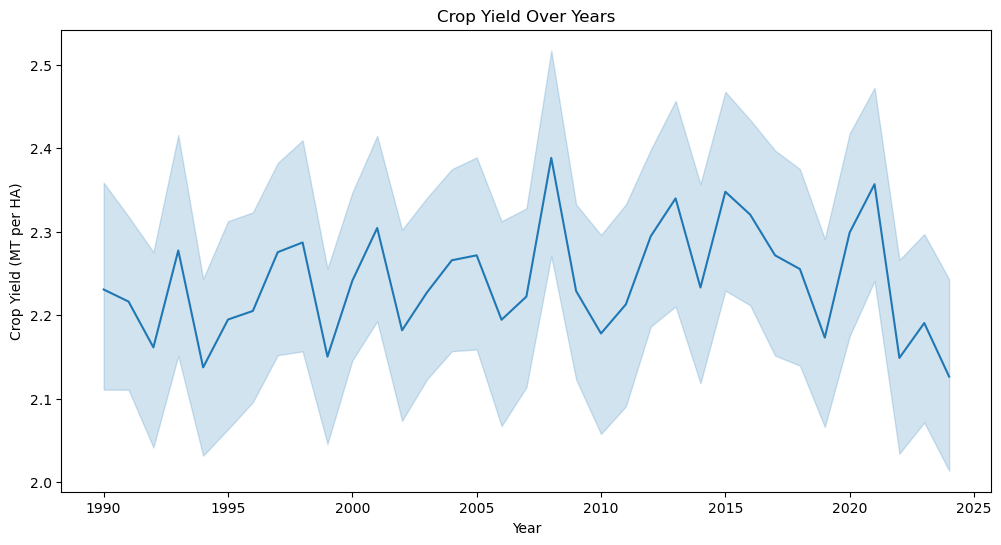

In [163]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Crop_Yield_MT_per_HA', data=data)
plt.title('Crop Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield (MT per HA)')
plt.show()

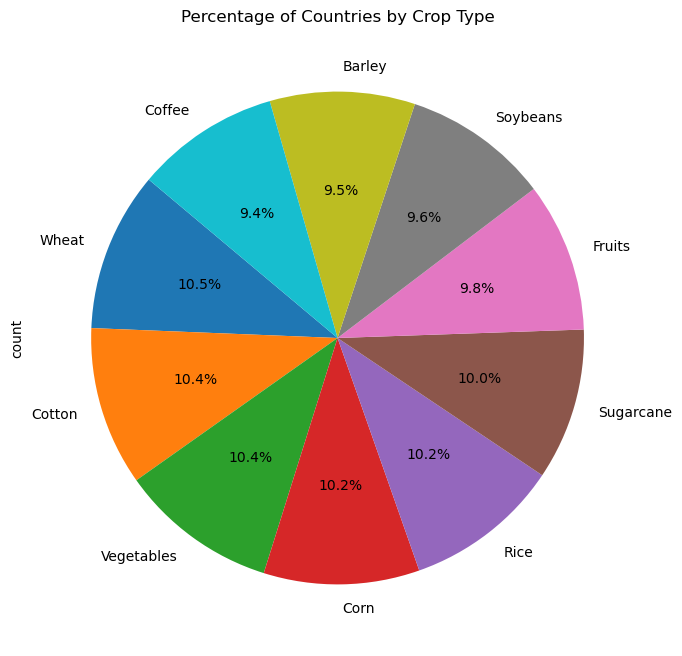

In [165]:
plt.figure(figsize=(8, 8))
data['Crop_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Countries by Crop Type')
plt.show()

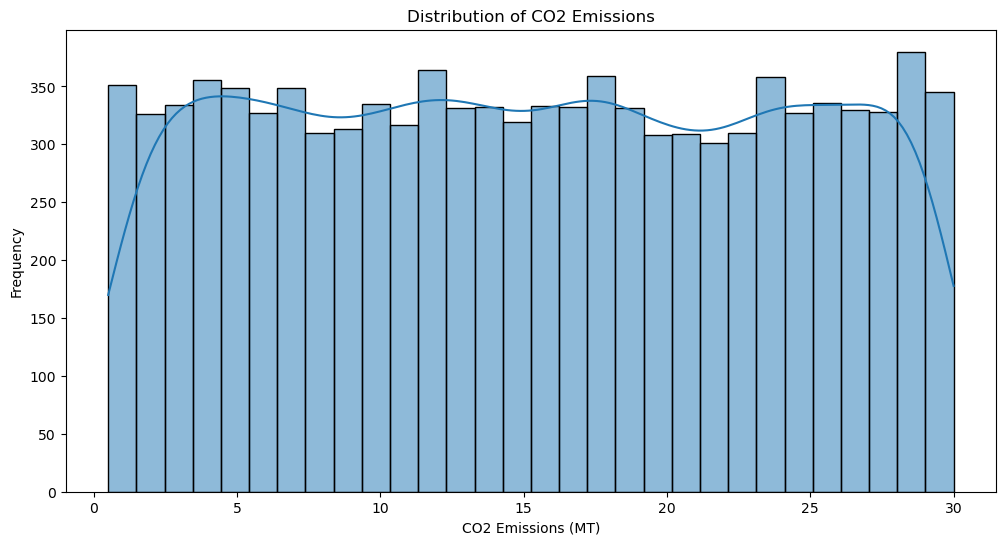

In [167]:
plt.figure(figsize=(12, 6))
sns.histplot(data['CO2_Emissions_MT'], bins=30, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (MT)')
plt.ylabel('Frequency')
plt.show()

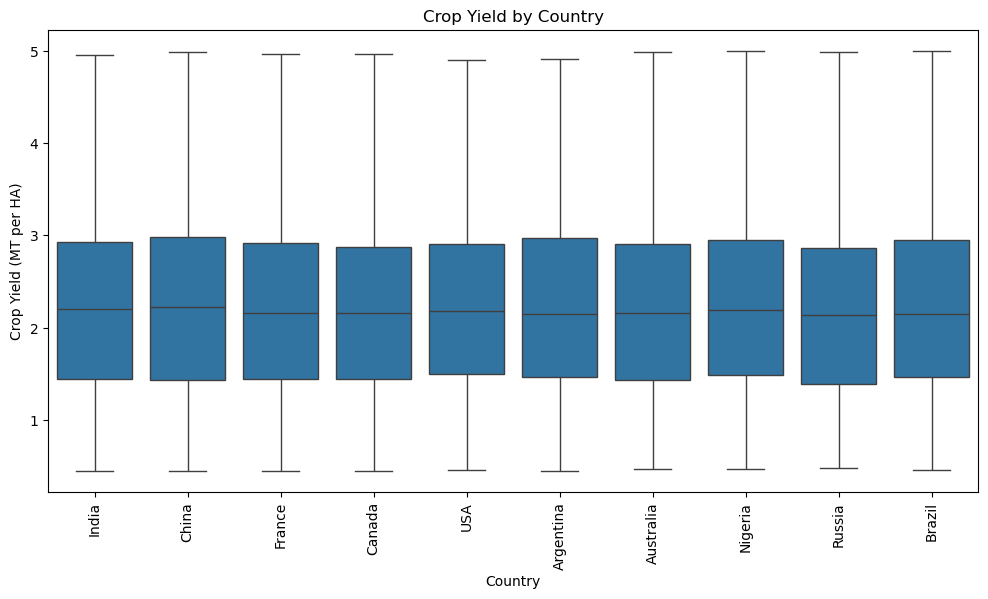

In [169]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Crop_Yield_MT_per_HA', data=data)
plt.title('Crop Yield by Country')
plt.xlabel('Country')
plt.ylabel('Crop Yield (MT per HA)')
plt.xticks(rotation=90)
plt.show()

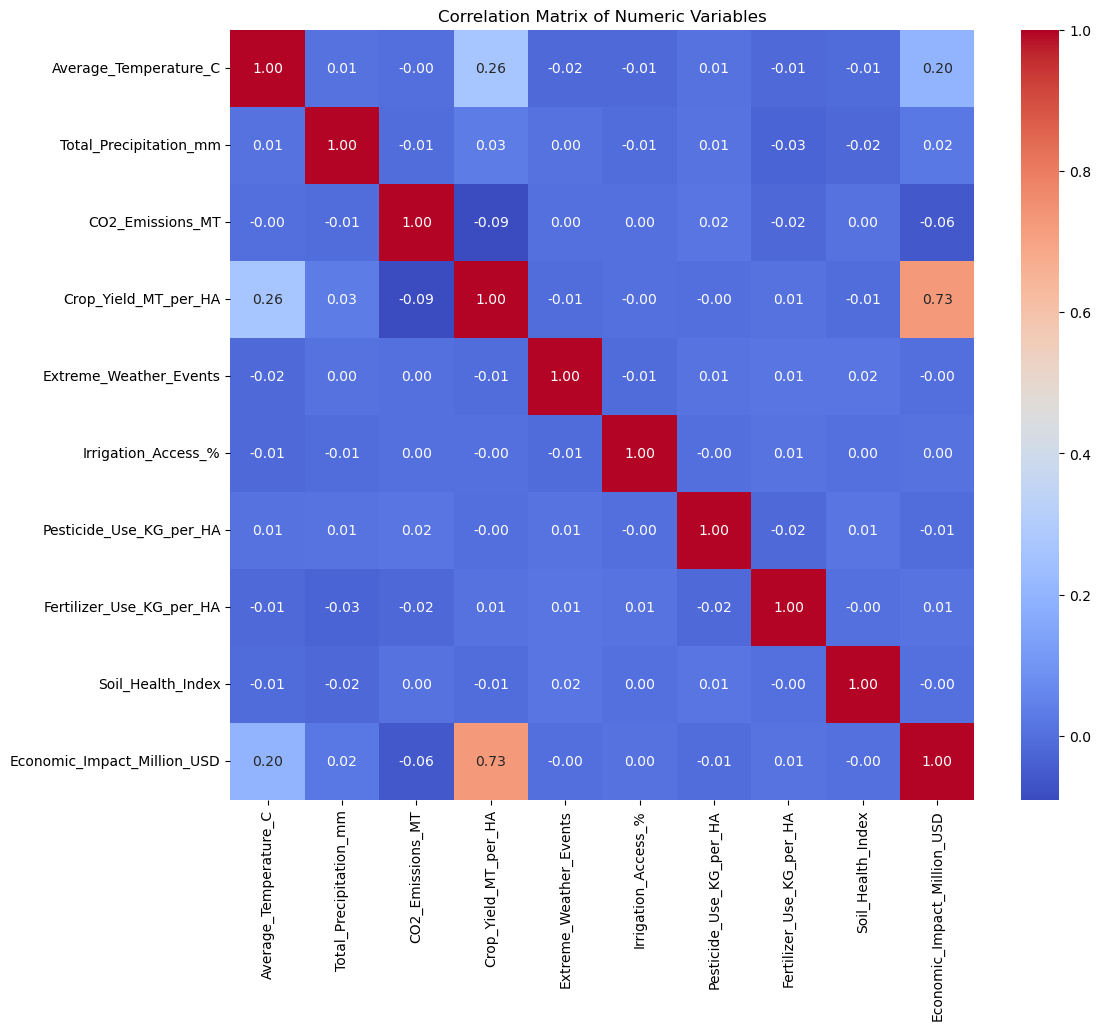

In [171]:
plt.figure(figsize=(12, 10))
correlation_matrix = data[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 
                           'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 
                           'Soil_Health_Index', 'Economic_Impact_Million_USD']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

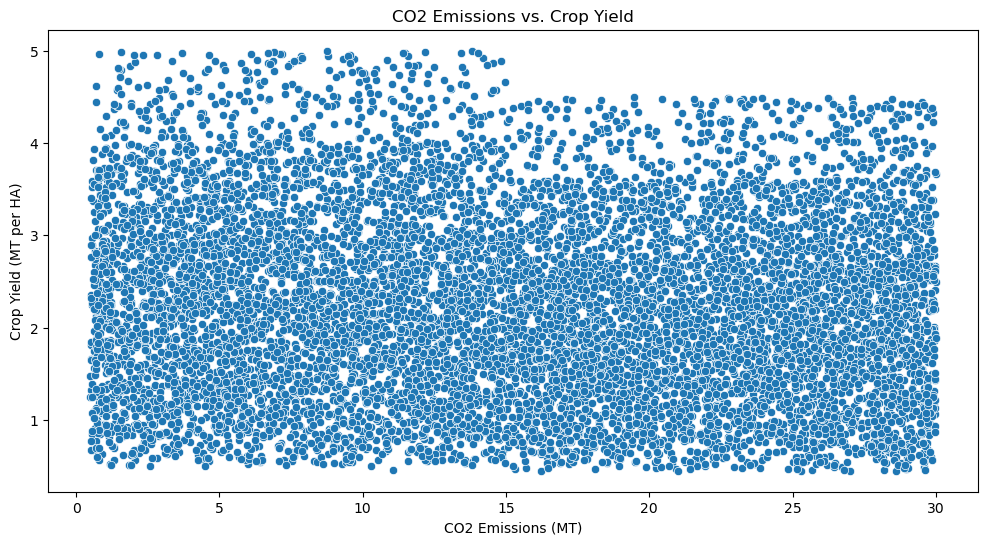

In [173]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CO2_Emissions_MT', y='Crop_Yield_MT_per_HA', data=data)
plt.title('CO2 Emissions vs. Crop Yield')
plt.xlabel('CO2 Emissions (MT)')
plt.ylabel('Crop Yield (MT per HA)')
plt.show()

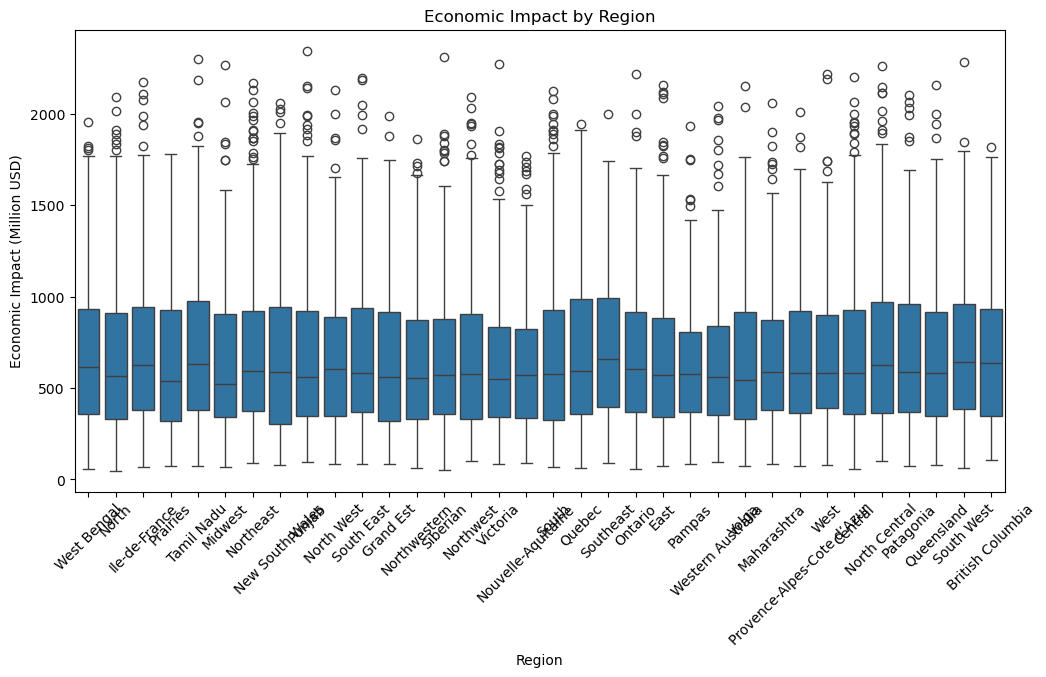

In [175]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Economic_Impact_Million_USD', data=data)
plt.title('Economic Impact by Region')
plt.xlabel('Region')
plt.ylabel('Economic Impact (Million USD)')
plt.xticks(rotation=45)
plt.show()

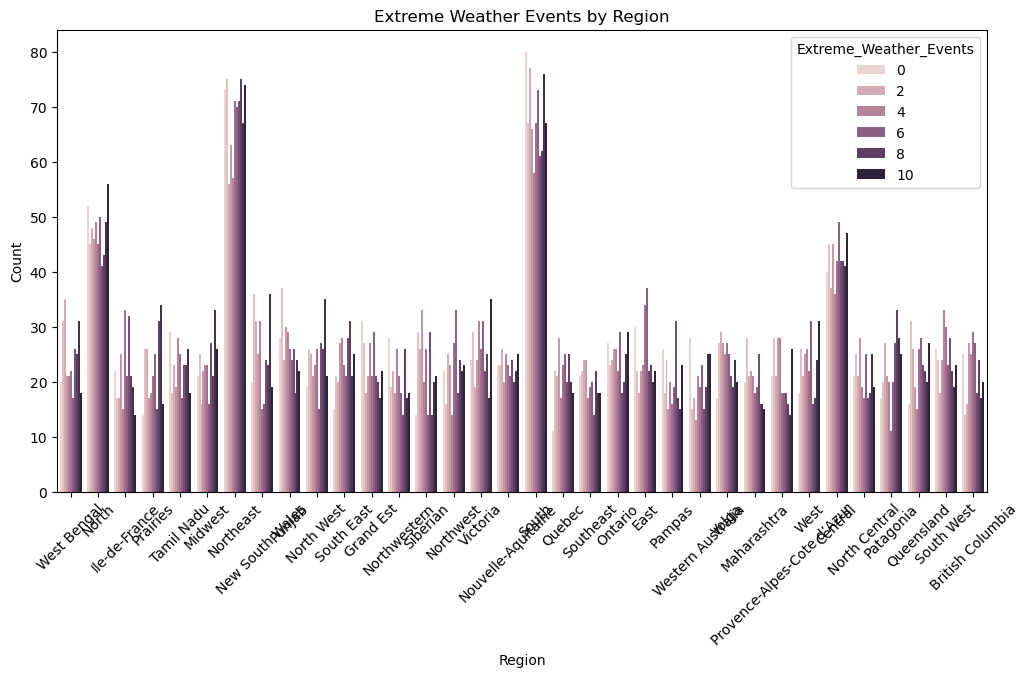

In [177]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', hue='Extreme_Weather_Events', data=data)
plt.title('Extreme Weather Events by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

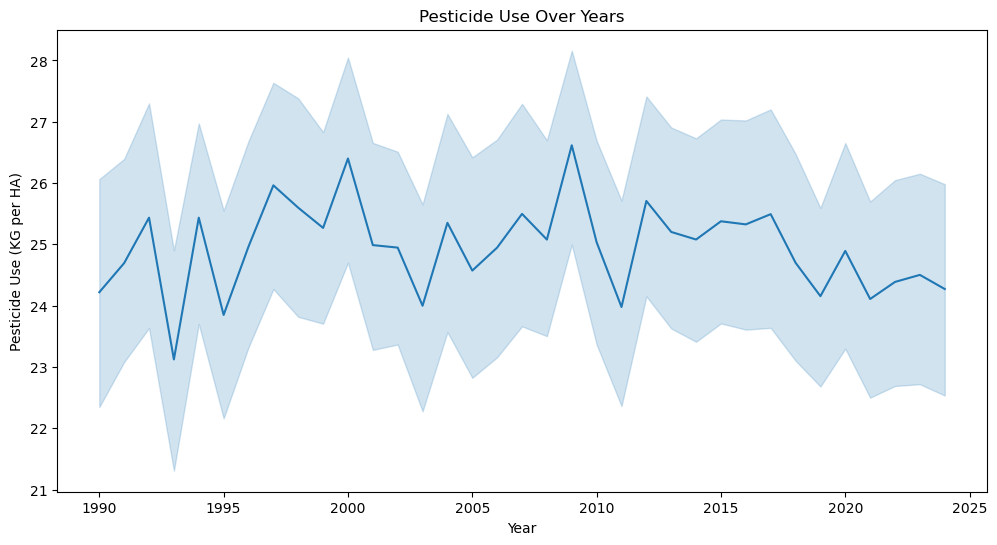

In [179]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Pesticide_Use_KG_per_HA', data=data)
plt.title('Pesticide Use Over Years')
plt.xlabel('Year')
plt.ylabel('Pesticide Use (KG per HA)')
plt.show()

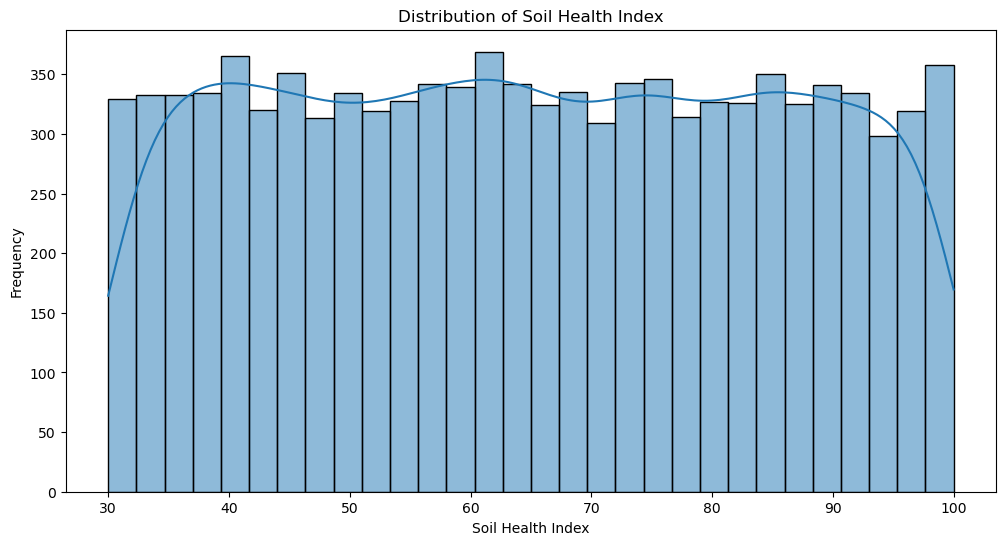

In [181]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Soil_Health_Index'], bins=30, kde=True)
plt.title('Distribution of Soil Health Index')
plt.xlabel('Soil Health Index')
plt.ylabel('Frequency')
plt.show()

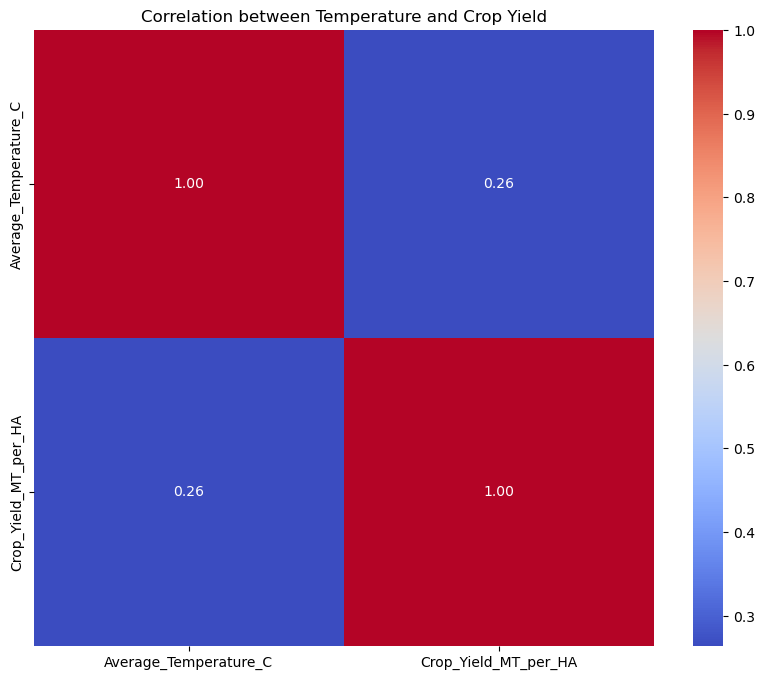

In [183]:
plt.figure(figsize=(10, 8))
temp_yield_corr = data[['Average_Temperature_C', 'Crop_Yield_MT_per_HA']].corr()
sns.heatmap(temp_yield_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Temperature and Crop Yield')
plt.show()

#### Machine Learning 

### Feature Engineering

In [222]:
# Step 2: Define Features and Target Variable
features = data[['Year','Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA']]
target = data['Crop_Yield_MT_per_HA']

In [224]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("\nData Split into Training and Testing Sets Successfully.\n")


Data Split into Training and Testing Sets Successfully.



### Model Selection

In [227]:
# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR  # For Support Vector Regression 
import xgboost as xgb # For XGBoost Regression

In [229]:
# Step 3: Build and Train the Models
# 1. Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
linear_pred = lin_reg.predict(X_test)
print("Linear Regressor Model Trained Successfully.\n")

Linear Regressor Model Trained Successfully.



In [231]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Model Trained Successfully.\n")

Random Forest Model Trained Successfully.



In [232]:
# 3. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Model Trained Successfully.\n")

Gradient Boosting Model Trained Successfully.



In [233]:
# 4. XGBoost Regressor
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Model Trained Successfully.\n")

XGBoost Model Trained Successfully.



### Model Evaluation

In [238]:
# Step 4: Evaluate the Models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # For model evaluation metrics

In [240]:
# Function to Evaluate Models
def evaluate_model(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return {'MAE': mae, 'MSE': mse, 'R² Score': r2}

In [242]:
# Evaluate Linear Regressor
ln_results = evaluate_model(y_test,linear_pred)
print(f"Linear Regressor Results:\n MAE: {ln_results['MAE']}, MSE: {ln_results['MSE']}, R² Score: {ln_results['R² Score']}")

Linear Regressor Results:
 MAE: 0.8143205455027509, MSE: 0.9835196709243312, R² Score: 0.06817068866017151


In [244]:
# Evaluate Random Forest Regressor
rf_results = evaluate_model(y_test, rf_predictions)
print(f"Random Forest Results:\n MAE: {rf_results['MAE']}, MSE: {rf_results['MSE']}, R² Score: {rf_results['R² Score']}")

Random Forest Results:
 MAE: 0.7272096425, MSE: 0.7474276997006125, R² Score: 0.29185449027799015


In [246]:
# Evaluate Gradient Boosting Regressor
gb_results = evaluate_model(y_test, gb_predictions)
print(f"Random Forest Results:\n MAE: {gb_results['MAE']}, MSE: {gb_results['MSE']}, R² Score: {gb_results['R² Score']}")

Random Forest Results:
 MAE: 0.7185184136050674, MSE: 0.7177450328255631, R² Score: 0.31997713982999365


In [248]:
# Evaluate XGBoost Regressor
xgb_results = evaluate_model(y_test, xgb_predictions)
print(f"Random Forest Results:\n MAE: {xgb_results['MAE']}, MSE: {xgb_results['MSE']}, R² Score: {xgb_results['R² Score']}")

Random Forest Results:
 MAE: 0.728280645749092, MSE: 0.752311968373541, R² Score: 0.28722692171129727


#### Saving my model

In [251]:
import joblib

In [253]:
joblib.dump(gb_model, 'ClimateAgric.pkl')

['ClimateAgric.pkl']

### Create the Streamlit App

### Note 

'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events', 
                 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index'

In [383]:
# Create the file Expresso_Churn_Prediction_Streamlit_App.py in write mode
with open("Climate_Change_On_Agric_Prod_App.py", "w") as file:
    # Writing the Streamlit code into the file
    file.write("""
# Import necessary libraries
import streamlit as st
import pandas as pd
import joblib

# Load the pre-trained model
model = joblib.load("Desktop/ClimateAgric.pkl")  


# Set up the Streamlit app
st.title('Predicting the Impact of Climate Change on Agricultural Productivity')
st.write("This app predicts the **Impact of Climate Change on Agricultural Productivity**.")


# Sidebar for user input
st.sidebar.header("Input Features 🌟")
st.sidebar.markdown("Adjust the sliders and inputs below to customize the prediction.")

# Input fields
year = st.sidebar.slider("Year", min_value=1990, max_value=2030, step=1, value=2024)
avg_temp = st.sidebar.number_input("Average Temperature (°C)", min_value=0.0, max_value=50.0, step=0.1)
precipitation = st.sidebar.number_input("Total Precipitation (mm)", min_value=0.0, max_value=5000.0, step=1.0)
co2_emissions = st.sidebar.number_input("CO2 Emissions (MT)", min_value=0.0, max_value=100.0, step=0.1)
pesticide_use = st.sidebar.number_input("Pesticide Use (KG/HA)", min_value=0.0, max_value=100.0, step=0.1)
fertilizer_use = st.sidebar.number_input("Fertilizer Use (KG/HA)", min_value=0.0, max_value=100.0, step=0.1)


# Create a dictionary for the model input
input_data = {
        "Year": year,
        "Average_Temperature_C": avg_temp,
        "Total_Precipitation_mm": precipitation,
        "CO2_Emissions_MT": co2_emissions,
        "Pesticide_Use_KG_per_HA": pesticide_use,
        "Fertilizer_Use_KG_per_HA": fertilizer_use,
   
                    }

# Convert the dictionary to a DataFrame
input_df = pd.DataFrame([input_data])

st.markdown("---")

# Display user input

# Display input data
st.subheader("🔍 User Input Summary")
st.dataframe(input_df, width=700)

st.markdown("---")

    # Load model and make prediction
prediction = model.predict(input_df)
    
    # Display prediction
if st.button("Predict Crop Yield"):
    # Make prediction when the button is clicked
    prediction = model.predict(input_df)

 # Display prediction
    st.subheader("Predicted Crop Yield (MT/HA)")
    st.write(f"{prediction[0]:,.2f}")

st.markdown("---")

st.caption("This App is developed to explore the intersection of **climate change** and **agricultural productivity** using machine learning.")

st.write("Contact Details")
st.caption("**Developer:** Bamidele David")  
st.caption("**Contact:** [davidbamidele16@gmail.com]")  
st.caption("**GitHub:** [https://github.com/David-Bamidele]")


""")